In [25]:
mtcars2 <- within(mtcars, {
  vs <- factor(vs, labels = c("V", "S"))
  am <- factor(am, labels = c("automatic", "manual"))
  cyl <- factor(cyl, labels = c("4", "6","8"))
  gear <- factor(gear, labels = c("3", "4","5"))
  carb <- factor(carb, labels = c("1", "2","3","4","6","8"))
})

# Paso 1: Inspección de los datos
# Mostramos las primeras filas del conjunto de datos mtcars2.
# Esto nos permite ver las variables y sus tipos.
head(mtcars2)

#Comentario:
#Aunque las variables Cyl, gear y carb tienen el sentido del orden, lo defino 
#como "factor" porque cilindros de un auto, no se puede comparar con cilindros de otra.

#Se puede incorporar "ordered" cuando estamos con variables que tienen espacio regular
#entre niveles (pocos niveles) tal como temperatura= 20, 40 y 60°C, concentracion de
#producto 10, 20 y 30 g/L. En las salidas se entrega resultados con regresión polinomial


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,V,manual,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,V,manual,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,S,manual,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,S,automatic,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,V,automatic,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,S,automatic,3,1


In [ ]:

lin<-lm(mpg~cyl+disp+hp+drat+wt+qsec+gear+carb,data=mtcars2)
summary(lin)

cor(mtcars[,c(-2,-8,-9,-10,-11)])#Se puede ver ciertas correlaciones altas

#install.packages("car")
library(car)
car::vif(lin)#calculo de los VIF para cada variable tomando en cuenta los grados de libertad de las variables categoricas
cal.vif<-car::vif(lin)
cal.vif[,3]<-cal.vif[,3]^2
cal.vif#hay que considerar el cuadrado para poder ocupar las mismas reglas arbitrarias



Call:
lm(formula = mpg ~ cyl + disp + hp + drat + wt + qsec + gear + 
    carb, data = mtcars2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6943 -1.1048 -0.1590  0.7579  4.7407 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 25.17505   15.88574   1.585   0.1314  
cyl6        -3.12043    2.63244  -1.185   0.2522  
cyl8        -2.40081    6.00299  -0.400   0.6942  
disp         0.03715    0.02834   1.311   0.2073  
hp          -0.06126    0.03393  -1.806   0.0887 .
drat         1.22824    2.35984   0.520   0.6094  
wt          -4.72407    2.35082  -2.010   0.0606 .
qsec         0.37236    0.71972   0.517   0.6116  
gear4        2.30651    2.69097   0.857   0.4033  
gear5        3.15671    3.11028   1.015   0.3244  
carb2       -1.71172    1.73795  -0.985   0.3385  
carb3        2.19432    3.91140   0.561   0.5821  
carb4       -0.27189    3.73274  -0.073   0.9428  
carb6        2.69151    5.52212   0.487   0.6322  
carb8        5.49200    7.533

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


Installing package into ‘/home/alvarezg/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



,GVIF,Df,GVIF^(1/(2*Df))
cyl,90.448316,2,3.083899
disp,52.364171,1,7.236309
hp,22.969294,1,4.792629
drat,6.758744,1,2.599758
wt,22.461514,1,4.739358
qsec,7.022074,1,2.649920
gear,27.306684,2,2.285953
carb,236.440793,5,1.727318


,GVIF,Df,GVIF^(1/(2*Df))
cyl,90.448316,2,9.510432
disp,52.364171,1,52.364171
hp,22.969294,1,22.969294
drat,6.758744,1,6.758744
wt,22.461514,1,22.461514
qsec,7.022074,1,7.022074
gear,27.306684,2,5.225580
carb,236.440793,5,2.983627


In [27]:

###################################################
#1a solución: eliminar las variables problematicas#
###################################################

#eliminamos la variable con el VIF el más alto
lin2<-lm(mpg~cyl+hp+drat+wt+qsec+gear+carb,data=mtcars2)
car::vif(lin2)
cal.vif2<-car::vif(lin2)
cal.vif2[,3]<-cal.vif2[,3]^2
cal.vif2
summary(lin2)

#el VIF asociado a la variable "hp" sigue alto

lin3<-lm(mpg~cyl+drat+wt+qsec+gear+carb,data=mtcars2)
car::vif(lin3)
cal.vif3<-car::vif(lin3)
cal.vif3[,3]<-cal.vif3[,3]^2
cal.vif3
summary(lin3)#Se puede eliminar otras variables de este modelo en una etapa posterior, pero en esta etapa hemos arreglado el problema de colinealidad.

#quizas seria un error eliminar "wt" porque es la variable la más significativa y la 
#mas correlacionada con mpg. Podemos parar aquí o seguir eliminando "qsec".

lin4<-lm(mpg~cyl+drat+wt+gear+carb,data=mtcars2)
car::vif(lin4)
cal.vif4<-car::vif(lin4)
cal.vif4[,3]<-cal.vif4[,3]^2
cal.vif4
summary(lin4)#Ninguna variable parece pertinente en este modelo, salvo quizás la variable "carb". El modelo 3 es mejor.


,GVIF,Df,GVIF^(1/(2*Df))
cyl,54.243930,2,2.713862
hp,22.124404,1,4.703659
drat,6.743876,1,2.596897
wt,9.853265,1,3.138991
qsec,6.949552,1,2.636200
gear,23.462346,2,2.200862
carb,70.350883,5,1.530125


,GVIF,Df,GVIF^(1/(2*Df))
cyl,54.243930,2,7.365048
hp,22.124404,1,22.124404
drat,6.743876,1,6.743876
wt,9.853265,1,9.853265
qsec,6.949552,1,6.949552
gear,23.462346,2,4.843795
carb,70.350883,5,2.341283



Call:
lm(formula = mpg ~ cyl + hp + drat + wt + qsec + gear + carb, 
    data = mtcars2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6235 -1.3786 -0.0600  0.7341  4.2550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 25.13782   16.19958   1.552    0.138
cyl6        -1.65385    2.42993  -0.681    0.505
cyl8         2.57615    4.74164   0.543    0.594
hp          -0.05273    0.03395  -1.553    0.138
drat         1.37332    2.40382   0.571    0.575
wt          -2.41532    1.58777  -1.521    0.146
qsec         0.27648    0.73014   0.379    0.709
gear4        1.36086    2.64369   0.515    0.613
gear5        3.51842    3.15923   1.114    0.280
carb2       -2.02936    1.75497  -1.156    0.263
carb3       -1.69936    2.59505  -0.655    0.521
carb4       -1.48245    3.68815  -0.402    0.692
carb6       -0.64043    4.99919  -0.128    0.899
carb8        1.15798    6.90246   0.168    0.869

Residual standard error: 2.756 on 18 degrees of freedom
Multiple 

,GVIF,Df,GVIF^(1/(2*Df))
cyl,26.874548,2,2.276855
drat,6.737126,1,2.595598
wt,9.840902,1,3.137021
qsec,6.920746,1,2.630731
gear,15.539744,2,1.985459
carb,25.511695,5,1.382528


,GVIF,Df,GVIF^(1/(2*Df))
cyl,26.874548,2,5.184067
drat,6.737126,1,6.737126
wt,9.840902,1,9.840902
qsec,6.920746,1,6.920746
gear,15.539744,2,3.942048
carb,25.511695,5,1.911384



Call:
lm(formula = mpg ~ cyl + drat + wt + qsec + gear + carb, data = mtcars2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5286 -1.3415  0.0000  0.9339  4.6307 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  21.9428    16.6549   1.318    0.203
cyl6         -1.5003     2.5165  -0.596    0.558
cyl8         -1.6272     4.0355  -0.403    0.691
drat          1.2552     2.4903   0.504    0.620
wt           -2.5027     1.6447  -1.522    0.145
qsec          0.2035     0.7552   0.269    0.791
gear4         2.5728     2.6181   0.983    0.338
gear5         2.2858     3.1695   0.721    0.480
carb2        -1.5570     1.7915  -0.869    0.396
carb3        -1.8036     2.6889  -0.671    0.510
carb4        -4.0459     3.4186  -1.183    0.251
carb6        -3.7936     4.7351  -0.801    0.433
carb8        -6.0811     5.2769  -1.152    0.263

Residual standard error: 2.856 on 19 degrees of freedom
Multiple R-squared:  0.8624,	Adjusted R-squared:  0.7754 
F-statisti

,GVIF,Df,GVIF^(1/(2*Df))
cyl,14.151380,2,1.939544
drat,6.737035,1,2.595580
wt,6.016477,1,2.452851
gear,11.994621,2,1.861001
carb,17.926314,5,1.334594


,GVIF,Df,GVIF^(1/(2*Df))
cyl,14.151380,2,3.761832
drat,6.737035,1,6.737035
wt,6.016477,1,6.016477
gear,11.994621,2,3.463325
carb,17.926314,5,1.781141



Call:
lm(formula = mpg ~ cyl + drat + wt + gear + carb, data = mtcars2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7546 -1.2962  0.0000  0.8764  4.8003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   25.228     11.081   2.277   0.0339 *
cyl6          -1.699      2.350  -0.723   0.4780  
cyl8          -2.335      2.992  -0.780   0.4444  
drat           1.258      2.432   0.517   0.6107  
wt            -2.226      1.256  -1.773   0.0915 .
gear4          2.650      2.541   1.043   0.3094  
gear5          2.060      2.985   0.690   0.4981  
carb2         -1.644      1.721  -0.955   0.3508  
carb3         -1.860      2.618  -0.711   0.4856  
carb4         -4.469      2.966  -1.507   0.1475  
carb6         -4.274      4.284  -0.998   0.3303  
carb8         -6.457      4.970  -1.299   0.2087  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.789 on 20 degrees of freedom
Multiple R-squared:  0.8618,	Ad

Installing package into ‘/home/alvarezg/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“package ‘MASS’ is not available for this version of R
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.4.0)
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.6)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


                   cyl6        cyl8        disp          hp        drat 
25.17505065 -3.12043420 -2.40081391  0.03714512 -0.06126315  1.22823951 
         wt        qsec       gear4       gear5       carb2       carb3 
-4.72406714  0.37236151  2.30650672  3.15671480 -1.71172237  2.19432372 
      carb4       carb6       carb8 
-0.27189226  2.69151310  5.49199638 

cyl6        cyl8        disp          hp        drat          wt 
-0.51656503 -0.62878447 -0.80717810 -1.00589758  0.80866726 -1.37018034 
       qsec       gear4       gear5       carb2       carb3       carb4 
 0.25983881  0.43334551  0.35643301 -0.03117192 -0.21174306 -0.82136610 
      carb6       carb8 
-0.19807821 -0.18250030

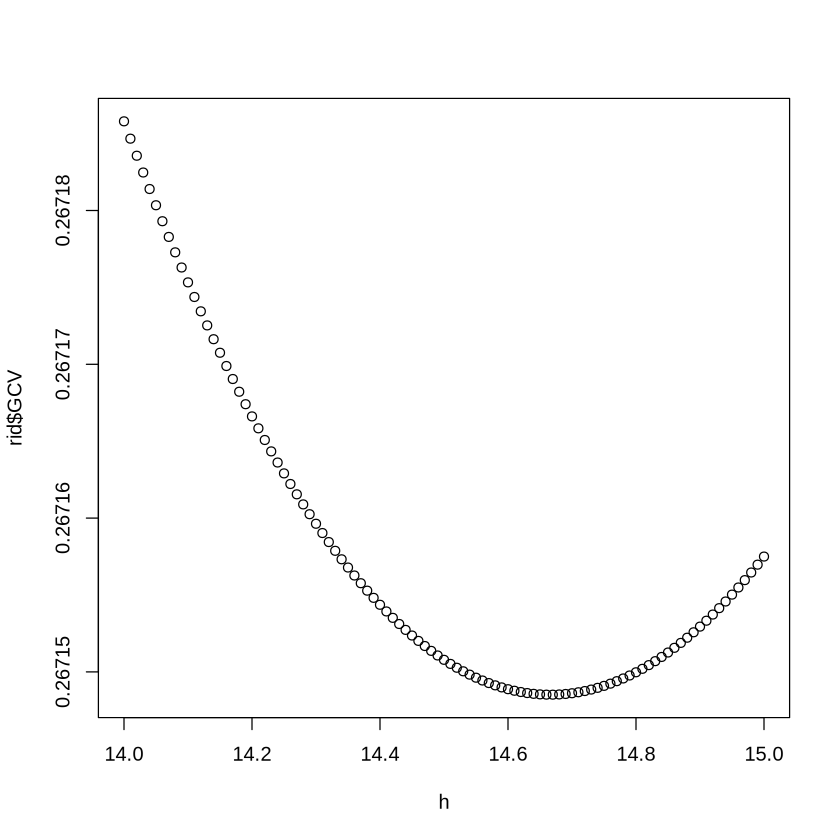

In [28]:
####################################
#2a solución: Hacer regresión ridge#
####################################

install.packages("MASS")
library(MASS)
lm.ridge(mpg~cyl+disp+hp+drat+wt+qsec+gear+carb,data=mtcars2, lambda = 0)#NO ridge regression
h<-seq(14, 15, by=0.01)
rid<-lm.ridge(mpg~cyl+disp+hp+drat+wt+qsec+gear+carb,data=mtcars2, lambda = h)#ridge regression
#rid$GCV
#rid$coef[,48]
#Para ubicar exactamente el punto optimal y aplicarlo 

plot(h,rid$GCV)

rid<-lm.ridge(mpg~cyl+disp+hp+drat+wt+qsec+gear+carb,data=mtcars2, lambda = 14.65)
rid$coef#estimación con el parametro "ridge" optimal

Data: 	X dimension: 32 5 
	Y dimension: 32 1
Fit method: svdpc
Number of components considered: 4

VALIDATION: RMSEP
Cross-validated using 32 leave-one-out segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps
CV           6.123    2.803    2.789    2.841    2.872
adjCV        6.123    2.799    2.785    2.836    2.867

TRAINING: % variance explained
     1 comps  2 comps  3 comps  4 comps
X      66.77    89.64    96.12    98.63
mpg    80.94    81.51    82.18    82.21


Comp 1    Comp 2    Comp 3    Comp 4 
66.774920 22.866890  6.480448  2.508475

Data: 	X dimension: 32 5 
	Y dimension: 32 1
Fit method: svdpc
Number of components considered: 1

VALIDATION: RMSEP
Cross-validated using 32 leave-one-out segments.
       (Intercept)  1 comps
CV           6.123    2.803
adjCV        6.123    2.799

TRAINING: % variance explained
     1 comps
X      66.77
mpg    80.94


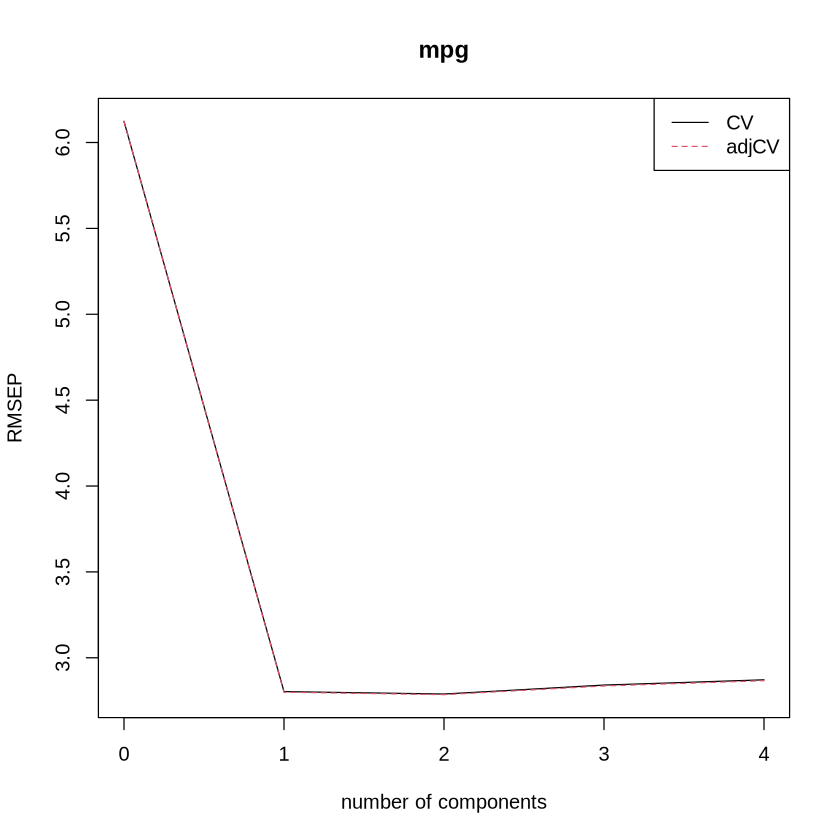

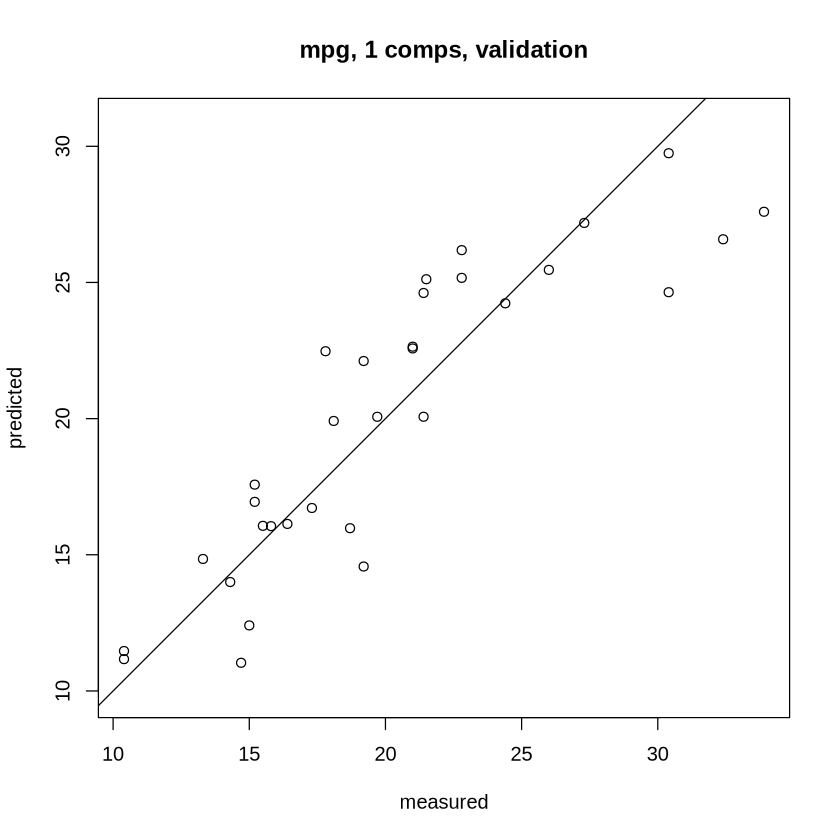

In [30]:
################################################################
#3a solución: Hacer regresión PCR (o de manera alternativa PLS)#
################################################################

#install.packages("pls")
library(pls)

PCRmtcars <- pcr(mpg~disp+hp+drat+wt+qsec, scale = TRUE,ncomp = 4, data = mtcars, validation = "LOO")
summary(PCRmtcars)#El criterio RMSE sugiere un solo componente

plot(RMSEP(PCRmtcars), legendpos = "topright")#Grafico del "CV"

explvar(PCRmtcars)#variabilidad explicada por los regresores

#Las salidas nos sugiere ocupar un solo componente considerando el porcentaje de "mpg" explicado. La alternativa 2 componentes podría no ser una buena opción (es verdad que con 2 tenemos "CV" más bajo que con un solo componente, pero son cercanos). Sin embargo podemos trabajar con 2 componentes igual que explica 90% de variabilidad por los "X". Las dos soluciones son buenas

#Quizás dado que el objetivo es explicar "mpg" y que agregar un segundo y tercer componentes no aporta mucho, quedamos nos con un solo componente

PCRmtcars2 <- pcr(mpg~disp+hp+drat+wt+qsec, scale = TRUE,ncomp = 1, data = mtcars, validation = "LOO")
summary(PCRmtcars2)#PCR con un solo componente

plot(PCRmtcars2, ncomp = 1, asp = 1, line = TRUE)#Cuidado que las predicciones siguen las observaciones, pero cuidado que las predicciones fueron calculadas con el mismo conjunto de datos que sirvieron a estimar el modelo

In [31]:

#####################################################################
#Solución cercana al PCR, la regresión PLS (Partially Least Squares)#
#####################################################################

pls.mtcars <- plsr(mpg~disp+hp+drat+wt+qsec, scale = TRUE,ncomp = 4, data = mtcars, validation = "LOO")
summary(pls.mtcars)#Vamos con un solo componente también


Data: 	X dimension: 32 5 
	Y dimension: 32 1
Fit method: kernelpls
Number of components considered: 4

VALIDATION: RMSEP
Cross-validated using 32 leave-one-out segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps
CV           6.123    2.786    2.800    2.822    2.874
adjCV        6.123    2.783    2.797    2.816    2.864

TRAINING: % variance explained
     1 comps  2 comps  3 comps  4 comps
X      66.73    86.57    94.70    97.51
mpg    81.50    82.54    83.85    84.89
